# 07.과적합 문제

### 훈련 데이터에만 잘 들어맞는 모델을 해결하는 방법은?

# 초음파 광물 예측 문제

### 광석과 일반 돌에 대해 음파 탐지기를 쏜 후 그 결과를 정리한 데이터를 바탕으로 광석과 일반 돌을 구분하는 문제
- 고먼(Gorman)과 세즈노프스키(Sejnowski) (1988)

### 광석과 일반 돌에 음파 탐지기를 쏜 후 결과를 측정하고 정리한 데이터
- dataset/sonar.csv

### 데이터 설명
* 샘플 수: 208
* 속성 수: 60
* 클래스: 2 (R, M)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 입력
df = pd.read_csv('./dataset/sonar.csv', header=None)

In [ ]:
df.describe()

In [ ]:
# 데이터 개괄 보기
df.info()

In [ ]:
# 데이터의 일부분 미리 보기
df.head()

In [ ]:
# R: Rock, M: Mine
df.iloc[:, 60].unique()

In [ ]:
dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 모델 설정
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=5)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

# 과적합(Overfit)
* 모델이 학습 데이터셋 안에서는 일정 수준 이상의 예측 정확도를 보이지만 새로운 데이터에는 잘 들어맞지 않는 것


* 모델의 학습이 일반화가 되지 않았음을 의미


<img src="http://mblogthumb4.phinf.naver.net/20160507_203/cattree_studio_1462572034508z9XPu_PNG/overfitting-logreg-ex.png?type=w800">

* 원인
  - 모델이 복잡함
      - 모델의 변수가 복잡한 경우
      - 신경망의 층과 노드가 너무 많은 경우
      - 데이터의 특징(feature)가 너무 많은 경우
  - 데이터가 부족함
      - 데이터 건수가 부족
      - 훈련(학습)셋과 테스트셋이 중복될 때

### 과적합을 방지하려면
1. 데이터를 학습(훈련)용 데이터셋과 테스트용 데이터셋으로 완전히 구분
    - 훈련:테스트 비율 = 7:3 또는 8:2
2. 훈련 데이터셋에 대하여 모델을 학습시킴
3. 학습이 끝난 모델을 테스트셋에 대해 테스트하여 모델이 일반화가 잘 되었는지 확인
    - 훈련셋에 대해서는 학습이 잘 되었지만 새로운 데이터에 대해서도 좋은 결과를 보여줄 것이라 확신할 수 없으므로 테스트셋으로 확인
    - 테스트셋에 대해서도 80% 정확도가 나왔다는 것은 이 모델이 전혀 새로운 데이터에 대해서도 80%의 정확도로 분류 또는 예측을 할 것이라는 확률(믿음)을 의미하는 것
4. 테스트셋에 대한 테스트 결과가 설정한 기준을 넘지 못하면 1. 단계부터 다시 수행
    - 기존의 훈련셋과 테스트셋을 버리고(아주 중요!) 다시 훈련셋과 테스트셋으로 구분해야 함
    - 하이퍼파라미터만 변경하고 기존의 훈련셋과 테스트셋을 재사용해서는 안됨!!!
    - 필요하다면 데이터를 추가하는 것도 좋은 방법

# 초음파 광물 예측: 훈련셋과 테스트셋 구분
* 훈련셋과 테스트셋 구분
```
from sklearn.model_selection import train_test_split
```

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import tensorflow as tf

# # seed 값 설정
# seed = 0
# np.random.seed(seed)
# tf.set_random_seed(seed)

df = pd.read_csv('./dataset/sonar.csv', header=None)

dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

### 학습 셋과 테스트 셋의 구분

In [ ]:
Y_obj[:10]

In [ ]:
Y

In [ ]:
X

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X.shape

In [ ]:
X_train.shape, X_test.shape

In [ ]:
train_test_split?

In [ ]:
X_train.shape, X_test.shape

In [ ]:
len(X_train) / len(X), len(X_test) / len(X)

In [ ]:
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

model.fit(X_train, Y_train, epochs=130, batch_size=5)

# 테스트셋에 모델 적용
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

In [ ]:
model.evaluate(X_train, Y_train)[1]

In [ ]:
model.evaluate(X_test, Y_test)[1]

### 모델이 어느정도까지 복잡해져야 하나
<img src="https://hackernoon.com/hn-images/1*vuZxFMi5fODz2OEcpG-S1g.png">

# 초음파 광물 예측: 은닉층의 노드 개수를 변화시키면서
* 고먼과 세즈노프스키가 설계한 모델과 유사하게 모델 생성
* 그리드 서치 방법론

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import tensorflow as tf

# seed 값 설정
# seed = 0
# np.random.seed(seed)
# tf.set_random_seed(seed)

nodes = [2, 3, 6, 10, 16, 24, 34, 46]
results = {}

df = pd.read_csv('./dataset/sonar.csv', header=None)

dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = np_utils.to_categorical(Y)

In [ ]:
Y_obj[:10]

In [ ]:
Y[:10]

In [ ]:
Y_encoded[:10]

### 그리드 서치

In [ ]:
for node in nodes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3)

    print(f'\n노드 개수: {node}')
    model = Sequential()
    model.add(Dense(node, input_dim=60, activation='sigmoid'))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                 )

    model.fit(X_train, Y_train, epochs=130, batch_size=5, verbose=0)

    # 테스트셋에 모델 적용
    results[node] = (model.evaluate(X_train, Y_train)[1], model.evaluate(X_test, Y_test)[1])
    print(f'훈련 정확도: {results[node][0]:0.3}, 테스트 정확도: {results[node][1]:0.3}')
    
print('\n\n작업종료!!!')

### 1 은닉층, [2, 3, 6, 12, 24] 은닉 노드

In [ ]:
r = pd.DataFrame(results, index=['Train', 'Test']).T
r

In [ ]:
(1-r).plot()

# 모델 저장
학습이 잘 된 모델을 저장


운영시스템에 모델을 로드하여 새로운 데이터에 대해 사용

### 패키지 추가
```
conda install -n deeplearning h5py
```

In [ ]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

df = pd.read_csv('./dataset/sonar.csv', header=None)

dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 학습셋과 테스트셋을 나눔
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

model.fit(X_train, Y_train, epochs=130, batch_size=5)

### 학습시킨 모델을 파일로 저장

In [ ]:
model.save('my_model.h5')

### 파일에 저장된 모델을 불러들여서 사용하기

In [ ]:
%pwd

In [ ]:
del model       # 테스트를 위해 메모리 내의 모델을 삭제

In [ ]:
model.predict?

In [ ]:
model = load_model('my_model.h5') # 모델을 새로 불러옴

In [ ]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))  # 불러온 모델로 테스트 실행

In [ ]:
model.evaluate(X_train, Y_train)[1]

# k-겹 교차 검증 (k-Fold Cross Validation)

### 일반적으로 딥러닝에 사용할 충분히 많은 데이터를 확보하기 어렵다
* 많지도 않은 데이터를 훈련셋과 테스트셋으로 나누어야 함
* 과소적합의 우려

### k겹 교차 검증을 사용하면 위 문제를 완화할 수 있다
* 데이터셋을 k 겹(폴드)로 나누어서 하나씩 테스트셋으로 사용하고 나머지 겹을 합해서 훈련셋으로 사용하는 방법
* 총 k 개의 결과가 나오고 이 결과들의 평균을 해당 에폭의 결과로 사용

<img src="https://miro.medium.com/max/4984/1*me-aJdjnt3ivwAurYkB7PA.png">

# 초음파 광물 예측: k겹 교차 검증

```
from sklearn.model_selection import StratifiedKFold
```

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

import numpy as np
import pandas as pd
import tensorflow as tf

# seed 값 설정
# seed = 0
# np.random.seed(seed)
# tf.set_random_seed(seed)

df = pd.read_csv('./dataset/sonar.csv', header=None)

dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

### 10-Fold Cross Validation

In [ ]:
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True)

### 폴드 개수 만큼 전체 에폭을 수행
10 * 100 = 1000 epochs

In [ ]:
# 빈 accuracy 배열
accuracy = []

# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

# 결과 출력
print("\n %.f fold accuracy:" % n_fold, accuracy)

In [ ]:
skf.split?

In [ ]:
np.array(accuracy, dtype=np.float32).mean()

# 최적의 하이퍼파라미터를 결정하기 위한 k겹 교차 검증
### 최적의 하이퍼파라미터를 찾을 때 사용

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">

### 교차 검증과 그리드 서치를 사용한 매개변수(하이퍼파라미터) 선택과 모델 평가의 작업 흐름 

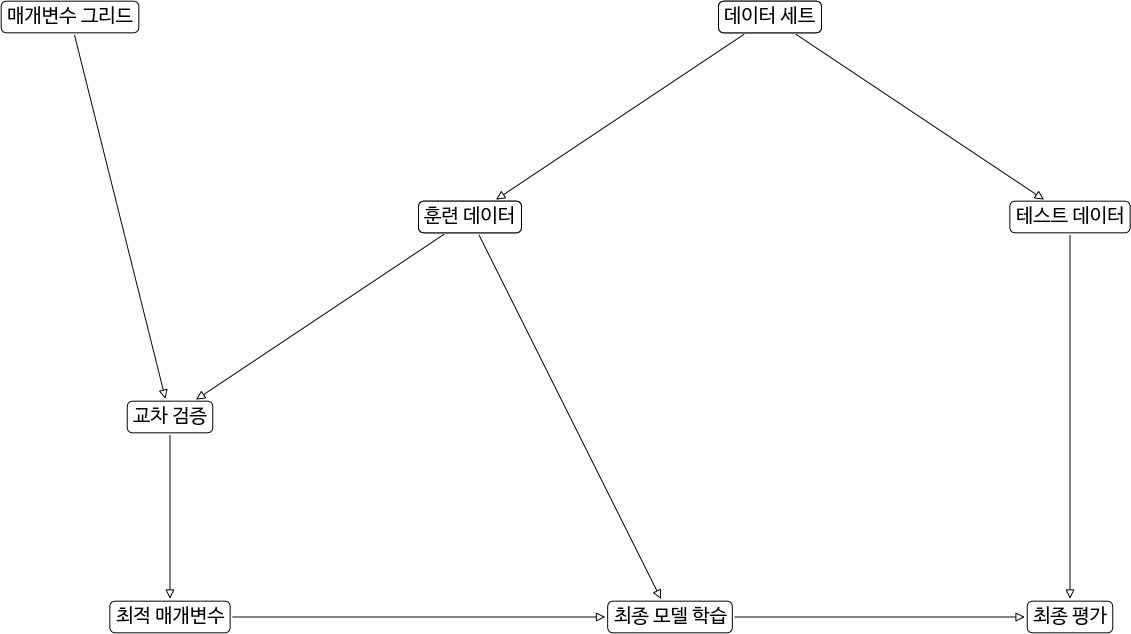

